# Using Pandas

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<b>load the data from the vehicles.csv file into pandas data frame

# Detailed exploratory data analysis with python

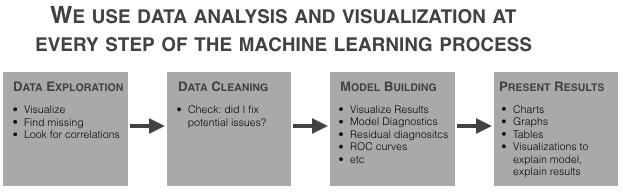

In [2]:
from  IPython.display import Image
Image("http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png")

Source: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python/notebook

# Preparations
For the preparations lets first import the necessary libraries and load the files needed for our EDA

In [3]:
## Your Code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [4]:
vehicles_df= pd.read_csv("data/vehicles.csv")
vehicles_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [5]:
#vehicles_df["CO2 Emission Grams/Mile"]=vehicles_df.shift(["CO2 Emission Grams/Mile"],1)

In [6]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

From these informations we can already see that all features are relevant for our EDA. All categorical and numerical values have no missing values. My recommendation is to not remove features, sicne they have the correct data types assign, have no missing values and can support the further analysis.

First exploration of the dataset:

- How many observations does it have?
- Look at all the columns: do you understand what they mean?
- Look at the raw data: do you see anything weird?
- Look at the data types: are they the expected ones for the information the column contains?

Now lets take a look at how the CO2 Emission Grams/Mile is distributed.

count    35952.000000
mean       475.316339
std        119.060773
min         37.000000
25%        395.000000
50%        467.736842
75%        555.437500
max       1269.571429
Name: CO2 Emission Grams/Mile, dtype: float64


<Figure size 648x576 with 0 Axes>

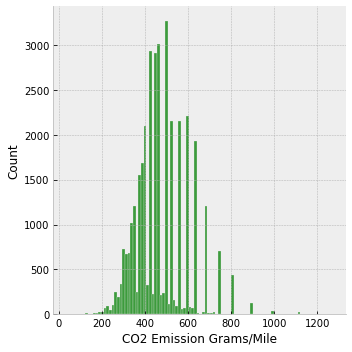

In [7]:
print(vehicles_df["CO2 Emission Grams/Mile"].describe())
plt.figure(figsize=(9,8))
sns.displot(vehicles_df["CO2 Emission Grams/Mile"], color='g', 
            bins = 100,);

# Numerical data distribution
For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [8]:
a=list(set(vehicles_df.dtypes.tolist()))

In [9]:
print(a)

[dtype('O'), dtype('int64'), dtype('float64')]


In [10]:
df_num = vehicles_df.select_dtypes(include = ['float64','int64'])
df_num.head()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,2.5,4.0,19.388824,18,17,17,522.764706,1950
1,1984,4.2,6.0,25.354615,13,13,13,683.615385,2550
2,1985,2.5,4.0,20.600625,16,17,16,555.437500,2100
3,1985,4.2,6.0,25.354615,13,13,13,683.615385,2550
4,1987,3.8,6.0,20.600625,14,21,16,555.437500,2550


Now lets plot them all:

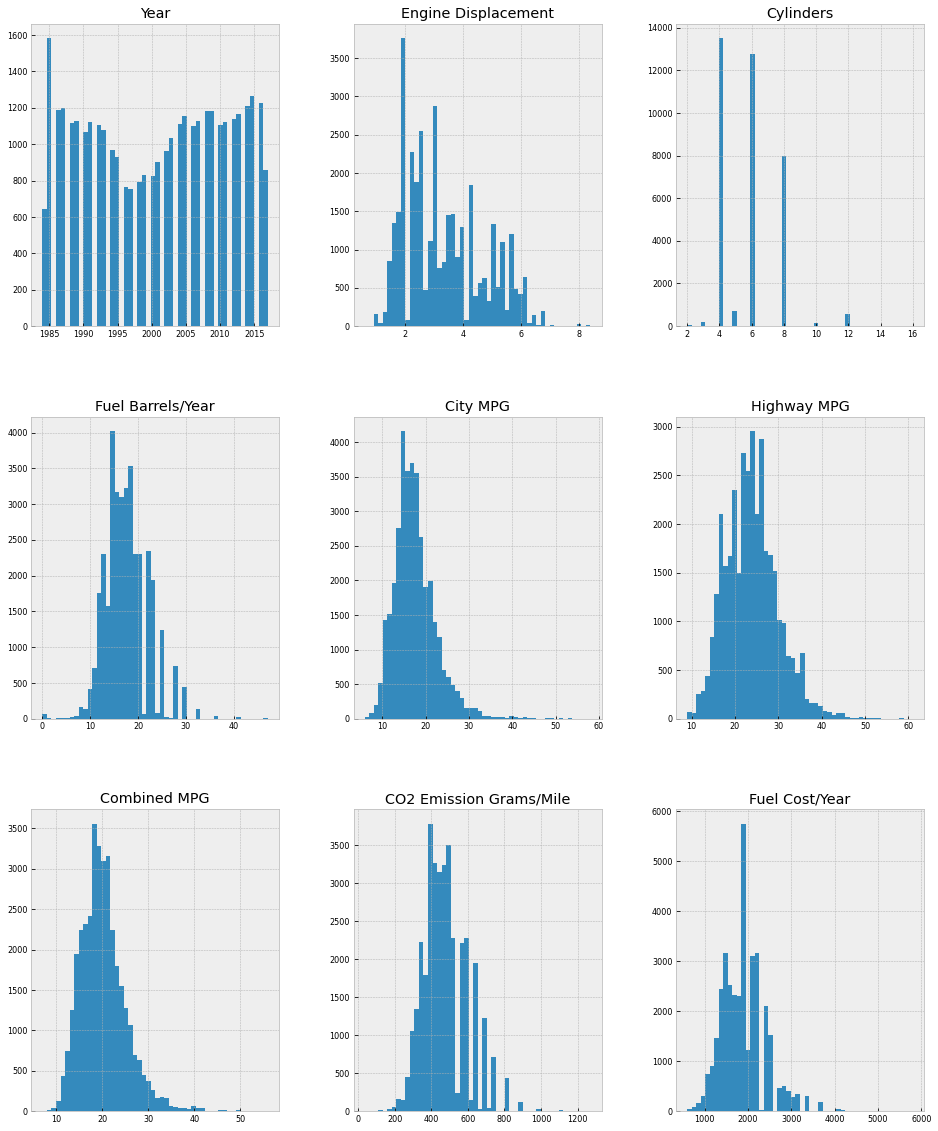

In [11]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, 
            ylabelsize=8);

Features such as `Fuel Barrels/Year`, `City MPG`, `Highway MPG` and `Fuel Cost/Year`... seems to share a similar distribution to the one we have with `CO2 Emission Grams/Mile`. Lets see if we can find new clues later.

Now we'll try to find which features are strongly correlated with CO2 Emission Grams/Mile. We'll store them in a var called golden_features_list. We'll reuse our df_num dataset to do so.

In [12]:
#df_num.drop(['CO2 Emission Grams/Mile'], axis=1)
#df_num()

df_num_corr = df_num.corr()['CO2 Emission Grams/Mile'][:-2]

golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with CO2 Emission Grams/Mile:\n{}".format(len(golden_features_list), golden_features_list))







There is 6 strongly correlated values with CO2 Emission Grams/Mile:
Fuel Barrels/Year      0.986189
Engine Displacement    0.803520
Cylinders              0.752393
City MPG              -0.894139
Combined MPG          -0.926229
Highway MPG           -0.926405
Name: CO2 Emission Grams/Mile, dtype: float64


Perfect, we now have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

- Plot the numerical features and see which ones have very few or explainable outliers
- Remove the outliers from these features and see which one can have a good correlation without their outliers

Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the CO2 Emission Grams/Mile.

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

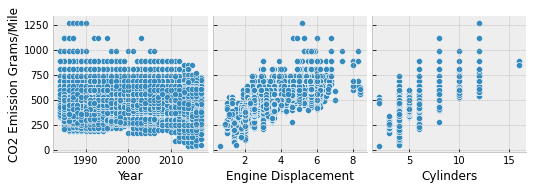

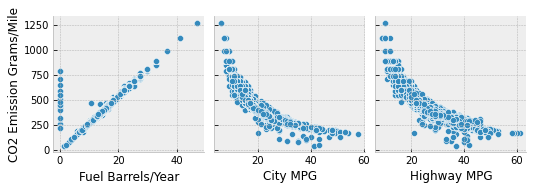

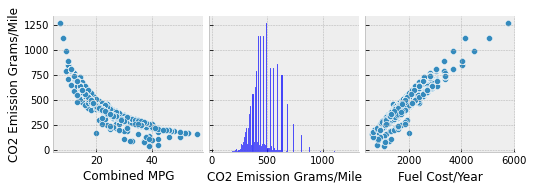

In [13]:
for i in range(0, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i+3],
                 y_vars=['CO2 Emission Grams/Mile'])

We can clearly identify some relationships. `Fuel Barrels/Year` and `Fuel Cost/Year` have a linear relationship with the CO2 Emission Grams/Mile and if we look closely at the data we can see that a the MPG features have a curvilinear relationship with the CO2 Emission Grams/Mile.

# Conclusion
By looking at correlation between numerical values we discovered 5 features which have a strong relationship to a house price. Besides correlation we didn't find any notable pattern on the datas which are not correlated.

# Feature to feature relationship
EDITEDITEDIT!!!Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

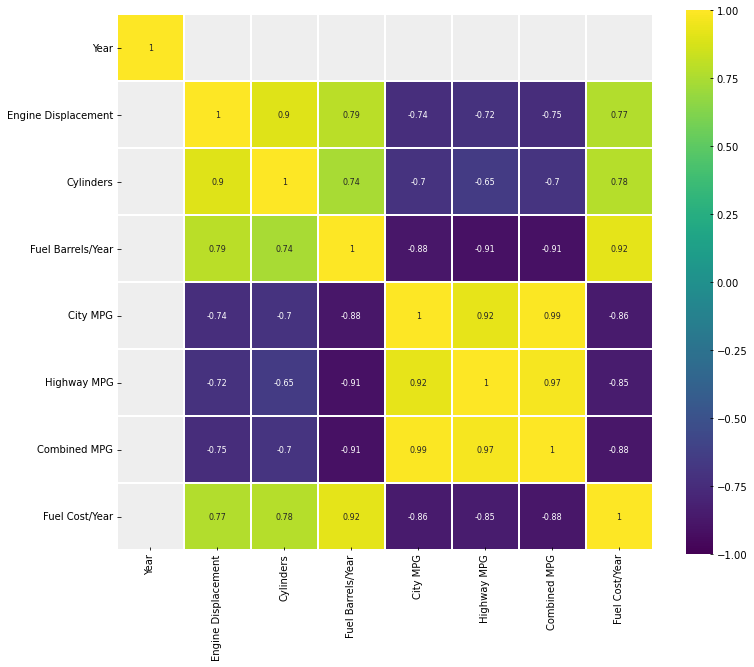

In [25]:
corr = df_num.drop('CO2 Emission Grams/Mile', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [31]:
import numpy as np
from sklearn.decomposition import PCA

df = pd.data_num(data=np.random.normal(0, 1, (20, 10)))

pca = PCA(n_components=5)
pca.fit(df)

ModuleNotFoundError: No module named 'sklearn'

### Cleaning and wrangling data

- Some car brand names refer to the same brand. Replace all brand names that contain the word "Dutton" for simply "Dutton". If you find similar examples, clean their names too. Use `loc` with boolean indexing.

- Convert CO2 Emissions from Grams/Mile to Grams/Km

- Create a binary column that solely indicates if the transmission of a car is automatic or manual. Use `pandas.Series.str.startswith` and .

- convert MPG columns to km_per_liter

In [17]:
## Your Code here
#Some car brand names refer to the same brand. Replace all brand names that contain the word "Dutton" 
#for simply "Dutton". If you find similar examples, clean their names too. Use loc with boolean indexing.
vehicles_df.loc[vehicles_df.Make.str.contains('Dutton'),'Make']="Dutton"
vehicles_df.loc[vehicles_df['Make'].str.contains("Dutton")]

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
11012,Dutton,Funeral Coach,1985,4.1,8.0,Automatic 4-spd,Front-Wheel Drive,Special Purpose Vehicles,Regular,19.388824,15,21,17,522.764706,1950
30164,Dutton,Funeral Coach 2WD,1984,6.0,8.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,32.961000,9,11,10,888.700000,3350
31754,Dutton,Funeral Coach 2WD,1984,6.0,8.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,32.961000,10,11,10,888.700000,3350


In [40]:
sns.catplot(x='Make',y='CO2 Emission Grams/Mile',data=vehicles_df)

SyntaxError: invalid syntax (595366213.py, line 1)

In [18]:
#Convert CO2 Emissions from Grams/Mile to Grams/Km

In [19]:
#Create a binary column that solely indicates if the transmission of a car is automatic or manual. 
#Use pandas.Series.str.startswith and.

In [20]:
#convert MPG columns to km_per_literconvert MPG columns to km_per_liter

Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Grams/Mile * Mile/Km -> Grams/Mile * 1 Mile/1.60934Km

$$ \frac{Grams}{Mile} * \frac{Mile}{Km} $$

$$ \frac{Grams}{Mile} * \frac{1 Mile}{1.60934Km}  $$

convert MPG columns to km_per_liter

MPG = Miles/Gallon -> Km/Liter

1 Mile = 1.60934 Km

1 Gallon = 3.78541 Liters

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{Km}{Miles} * \frac{Gallon}{Liters}$$

$$ \frac{Miles}{Gallon} -> \frac{Miles}{Gallon} * \frac{1.60934Km}{ 1Miles} * \frac{1 Gallon}{3.78541 Liters}$$

* ( 1.60934 / 3.78541 )


### Gathering insights:

- How many car makers are there? How many models? Which car maker has the most cars in the dataset?

- When were these cars made? How big is the engine of these cars?

- What's the frequency of different transmissions, drivetrains and fuel types?

- What's the car that consumes the least/most fuel?

In [21]:
# Your Code here


<b> (Optional)

What brand has the worse CO2 Emissions on average?

Hint: use the function `sort_values()`

In [22]:
## your Code here


Do cars with automatic transmission consume more fuel than cars with manual transmission on average?

In [23]:
## Your Code is here 
